In [ ]:
import cv2
import numpy as np

digits = cv2.imread("../datasets/digits.png", 0)

def show_image(image):
    cv2.namedWindow('image', cv2.WINDOW_NORMAL)
    cv2.imshow('image', image)
    cv2.waitKey()
    cv2.destroyAllWindows()

show_image(digits)
print(digits.shape)

In [ ]:

images = [np.hsplit (row, 100)
         for row in 
         np.vsplit(digits, 50)]

images = np.array(images, dtype=np.float32)

print(images.shape)

train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))

train_features -= np.mean(train_features, axis=0)
test_features -= np.mean(train_features, axis=0)

k = np.arange(10)
train_labels = np.repeat( k, 250).reshape(-1, 1)
test_labels = train_labels.copy()

knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)


ret, result, neighbors, dist = knn.findNearest(test_features, 3)

matches = np.equal(result, test_labels)

matches = matches.astype(np.int)
correct = np.count_nonzero(matches)

accuracy = (correct * 100.00)/ result.size
print('Accuracy: {}'.format(accuracy))

In [ ]:
import cv2
import numpy as np

fashion = cv2.imread("../datasets/fashion.png", 0)


images = [np.hsplit (row, 30)
         for row in 
         np.vsplit(fashion, 30)]

images = np.array(images, dtype=np.float32)

train_features = images[:, :15].reshape(-1, (28 * 28))
test_features = images[:, 15:30].reshape(-1, (28 * 28))

train_features -= np.mean(train_features, axis=0)
test_features -= np.mean(train_features, axis=0)

k = np.arange(10)
train_labels = np.repeat( k, 45).reshape(-1, 1)
test_labels = train_labels.copy()

knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)


ret, result, neighbors, dist = knn.findNearest(test_features, 3)

matches = np.equal(result, test_labels)

matches = matches.astype(np.int)
correct = np.count_nonzero(matches)

accuracy = (correct * 100.00)/ result.size


print('Accuracy: {}'.format(accuracy))


In [ ]:
import cv2
import numpy as np

fashion = cv2.imread("../datasets/fashion.png", 0)


images = [np.hsplit (row, 30)
         for row in 
         np.vsplit(fashion, 30)]

images = np.array(images, dtype=np.float32)

train_features = images[:, :15].reshape(-1, (28 * 28))
test_features = images[:, 15:30].reshape(-1, (28 * 28))

train_features -= np.mean(train_features, axis=0)
test_features -= np.mean(train_features, axis=0)

k = np.arange(10)
train_labels = np.repeat( k, 45).reshape(-1, 1)
test_labels = train_labels.copy()


model = cv2.ml.SVM_create()
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

model.train(train_features, cv2.ml.ROW_SAMPLE,train_labels)

result = model.predict(test_features)
    
matches =  np.equal(result[1], test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00)/ result[1].size

result = model.predict(test_features)

print('Accuracy: {}'.format(accuracy))

In [ ]:
import cv2
import numpy as np

fashion = cv2.imread("../datasets/digits.png", 0)


images = [np.hsplit (row, 100)
         for row in 
         np.vsplit(fashion, 50)]

images = np.array(images, dtype=np.float32)

train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))

train_features -= np.mean(train_features, axis=0)
test_features -= np.mean(train_features, axis=0)

k = np.arange(10)
train_labels = np.repeat( k, 250).reshape(-1, 1)
test_labels = train_labels.copy()


model = cv2.ml.SVM_create()
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

model.train(train_features, cv2.ml.ROW_SAMPLE,train_labels)

result = model.predict(test_features)

matches =  np.equal(result[1], test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00)/ result[1].size

result = model.predict(test_features)

print('Accuracy: {}'.format(accuracy))

(5000, 400)


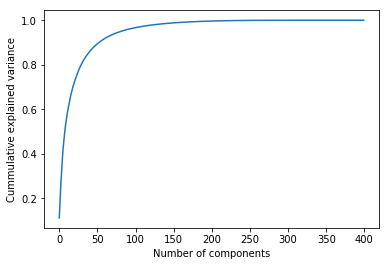

(625, 400)


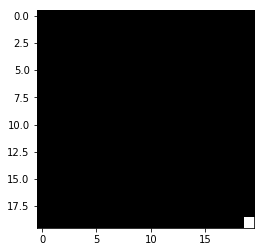

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 


mnist = cv2.imread("../datasets/digits.png", 0)

features = [np.hsplit (row, 100)
         for row in 
         np.vsplit(mnist, 50)]


features = np.array(features, dtype=np.float32)


features = features.reshape(-1, (20 * 20))
print(features.shape)

pca = PCA(n_components=100)
pca = PCA(n_components= features.shape[1])

pca.fit(features)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cummulative explained variance')
plt.show()

train_features = features[:,:50].reshape(-1, (20 * 20))
test_features = features[:, 50:100].reshape(-1, (20 * 20))

pca = PCA(n_components=100)
pca = PCA(n_components= features.shape[1])
pca.fit(train_features)

print(train_features.shape)

train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

train_features.shape, test_features.shape


inverse_pca = pca.inverse_transform(train_features)
inverse_pca.shape
plt.imshow(inverse_pca[0].reshape(20,20), cmap='gray')
